### Project - Working with Dates and Times in Python
PART ONE
- Combining dates and times | time-deltas
- ISO 8601 format
- Turning Strings into Dates
- STRFTIME

PART TWO
- Generate random time series data (Pandas dataframe analysis)
- Data Visualizations
- Percentage changes & difference
- Correlation analyis
- Run an Only Least Square Regression (OLS) model 
- Autocorrelation Analysis

In [1]:
#import numpy & pandas
import numpy as np
import pandas as pd

#import date
from datetime import date
#import datetime module
from datetime import datetime
#import timedeltas
from datetime import timedelta

#Import statsmodels for regression
import statsmodels.api as sm

##### Combining Dates and Times / Time-deltas# 

In [2]:
#Create example datetimes
start = datetime(2017,10,9,23,10,47)
end = datetime(2018,1,6,22,45,50)
print(start)
print(end)
#Access number of days between two dates (.days attribute of timedelat object)
print((end - start).days)
#Subtract datetimes 
duration = end - start
display(duration, duration.total_seconds())

2017-10-09 23:10:47
2018-01-06 22:45:50
88


datetime.timedelta(days=88, seconds=84903)

7688103.0

##### Timedeltas

In [3]:
#Create timedeltas
delta1 = timedelta(seconds = 1)
delta2 = timedelta(days = 1, minutes = 10)
delta3 = timedelta(days = 1, seconds = 1)
delta4 = timedelta(days = -1, weeks = -1)

print(start)
print(start + delta1)
print(start + delta2)
print(start + delta3)
print(start + delta4)

2017-10-09 23:10:47
2017-10-09 23:10:48
2017-10-10 23:20:47
2017-10-10 23:10:48
2017-10-01 23:10:47


##### ISO 8601 format

In [4]:
#create dates
d11 = date(2020,1,1)
d22 = date(2020,2,1)
d33 = date(2020,3,1)
d44 = date(2020,4,1)

#express specific date in isoformat
print(d44.isoformat())
#express specific date in isoformat and put in a list
print([d44.isoformat()])

dates = [d11,d22,d33,d44]
print(dates)

2020-04-01
['2020-04-01']
[datetime.date(2020, 1, 1), datetime.date(2020, 2, 1), datetime.date(2020, 3, 1), datetime.date(2020, 4, 1)]


#####  Turning Strings into Dates

In [5]:
#Create string
date_str = '10-27-2020'
#Convert to datetime - strptime
dto = datetime.strptime(date_str, '%m-%d-%Y').date()
print(type(dto))
print(dto)

<class 'datetime.date'>
2020-10-27


Through experimentation it is understood that in order to convert strings into datetime class the string must be in the correct format otherwise the conversion will produce an error. This gives insight into the trouble error or incorrect formatting within datasets may cause for data scientists working with date time datasets.

###### STRFTIME
Convert datetime to string

In [6]:
#Intialize a datetime
sd = date(2019,12,27)
print(sd)
print(type(sd))
#Initialize strftime
print(sd.strftime('Year %Y'))
print(sd.strftime('Month %m'))
print(sd.strftime('%d'))
print(type(sd.strftime('%Y-%m-%d')))

2019-12-27
<class 'datetime.date'>
Year 2019
Month 12
27
<class 'str'>


### Generate randomTime Series data - Pandas Dataframe Analysis

In [7]:
#create list of dates
dates_str = ['1-1-2018','1-2-2018', '1-3-2018','1-4-2018','1-5-2018','1-6-2018','1-7-2018','1-8-2018']

#convert strings into a list
##creat empty list
dates_lst = []
#initialize a for loop
for date in dates_str:
    dates_lst.append(datetime.strptime(date, '%m-%d-%Y').date())
print(type(dates_lst))
print(dates_lst)
print(dates_lst[3] - dates_lst[1])

### Creating Dataframe
#create empty list
randomlistX = []
randomlistY = []

#Randomly generate numbers for dataframe
import random
for x in range(0,8):
    n = random.randint(1,200)
    randomlistX.append(n)
for y in range(0,8):
    z = random.randint(1,400)
    randomlistY.append(z)
print(randomlistX)
print(randomlistY)

#Add dates to dataframe 
new_df = pd.DataFrame(dates_lst)
#add randomly generated data to dataframe
new_df['X'] = randomlistX
new_df['Y'] = randomlistY

print(type(new_df[0]))
print(type(new_df[:1]))
new_df, new_df.info(), new_df.describe()

<class 'list'>
[datetime.date(2018, 1, 1), datetime.date(2018, 1, 2), datetime.date(2018, 1, 3), datetime.date(2018, 1, 4), datetime.date(2018, 1, 5), datetime.date(2018, 1, 6), datetime.date(2018, 1, 7), datetime.date(2018, 1, 8)]
2 days, 0:00:00
[61, 107, 118, 23, 194, 172, 13, 90]
[206, 206, 364, 202, 20, 396, 63, 303]
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8 non-null      object
 1   X       8 non-null      int64 
 2   Y       8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


(            0    X    Y
 0  2018-01-01   61  206
 1  2018-01-02  107  206
 2  2018-01-03  118  364
 3  2018-01-04   23  202
 4  2018-01-05  194   20
 5  2018-01-06  172  396
 6  2018-01-07   13   63
 7  2018-01-08   90  303,
 None,
                 X           Y
 count    8.000000    8.000000
 mean    97.250000  220.000000
 std     64.864144  133.076777
 min     13.000000   20.000000
 25%     51.500000  167.250000
 50%     98.500000  206.000000
 75%    131.500000  318.250000
 max    194.000000  396.000000)

##### Data Visualizations

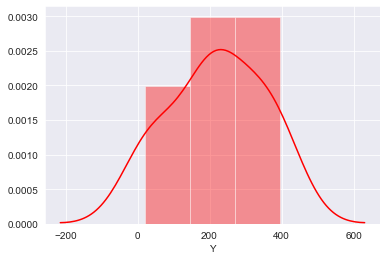

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(new_df['Y'],kde = True, hist = True, color = 'r')
sns.set_style('darkgrid')
plt.show()

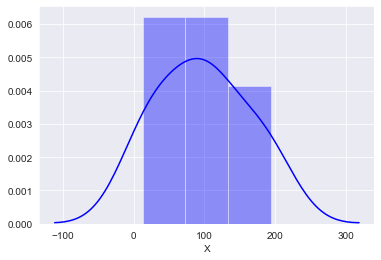

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(new_df['X'],kde = True, hist = True, color = 'b')
sns.set_style('darkgrid')
plt.show()

### Time Series Analysis

In [13]:
new_df

,0,X,Y
0,2018-01-01,61,206
1,2018-01-02,107,206
2,2018-01-03,118,364
3,2018-01-04,23,202
4,2018-01-05,194,20
5,2018-01-06,172,396
6,2018-01-07,13,63
7,2018-01-08,90,303


###### Compute the percent changes & difference

In [14]:
#Computing the percentage changes and difference via pandas methods
new_df['pct change X'] = new_df['X'].pct_change()
new_df['X diff'] = new_df['X'].diff()
new_df['pct change Y'] = new_df['Y'].pct_change()
new_df['Y diff'] = new_df['Y'].diff()
new_df

,0,X,Y,pct change X,X diff,pct change Y,Y diff
0,2018-01-01,61,206,NaN,NaN,NaN,NaN
1,2018-01-02,107,206,0.754098,46.0,0.000000,0.0
2,2018-01-03,118,364,0.102804,11.0,0.766990,158.0
3,2018-01-04,23,202,-0.805085,-95.0,-0.445055,-162.0
4,2018-01-05,194,20,7.434783,171.0,-0.900990,-182.0
5,2018-01-06,172,396,-0.113402,-22.0,18.800000,376.0
6,2018-01-07,13,63,-0.924419,-159.0,-0.840909,-333.0
7,2018-01-08,90,303,5.923077,77.0,3.809524,240.0


###### Correlation Analysis

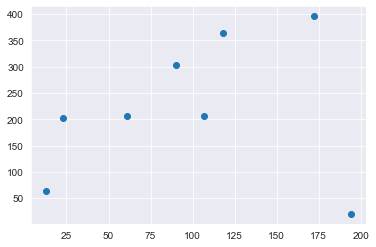

In [15]:
#scatterplot (visualizing the correlation of data-points)
plt.scatter(new_df['X'],new_df['Y'])
plt.show()

In [16]:
print('Correlation X Y: ',new_df['pct change X'].corr(new_df['pct change Y']))

Correlation X Y:  -0.15308283436927067


##### Run an Only Least Squares Regression Model (OLS) that fits the data
- Minimizes the sum of squared distances between the data points and regression line

Aim of Linear Regression is to find the best fit line to the data

In [17]:
#Add a constant to Dataframe for Regression Intercept
new_df = sm.add_constant(new_df)

C:\Users\Dean_\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
#Drop NAN Values
new_df = new_df.dropna()
#Initialize OLS Model
regress = sm.OLS(new_df['pct change Y'], new_df['pct change X']).fit()
print(regress.summary())

                                 OLS Regression Results                                
Dep. Variable:           pct change Y   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.159
Method:                 Least Squares   F-statistic:                            0.03942
Date:                Tue, 29 Jun 2021   Prob (F-statistic):                       0.849
Time:                        11:49:08   Log-Likelihood:                         -23.799
No. Observations:                   7   AIC:                                      49.60
Df Residuals:                       6   BIC:                                      49.54
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\Dean_\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [19]:
#Intercept
regress.params[0]

0.1616808945127215

###### R - Squared

###### Autocorrelation

Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged copy of itself over succesive time intervals. 
Its conceptually similar to the correlation between two different time series, but autocorrelation uses the same time series twice: once in its original form and once lagged one or more time periods.

Autocrrelation can also be referred to as a lagged correlation or serial correlation, as it measures the relationship between a features current value and its past value.

In [37]:
#Compute Autocorrelations
autocorrelationx = new_df['pct change X'].autocorr()
print('The autocorrelation of X pct change is:', autocorrelationx)

autocorrelationy = new_df['pct change Y'].autocorr()
print('The autocorrelation of Y pct change is:', autocorrelationy)

The autocorrelation of X pct change is: -0.41735966952934794
The autocorrelation of Y pct change is: -0.3238348315388847


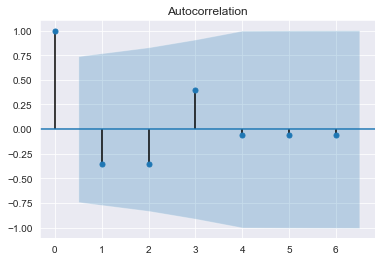

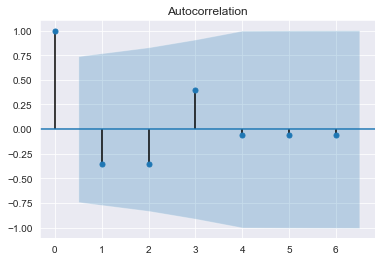

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(new_df['pct change X'], lags=6)